# CS 449 Final Project Proposal

Due: February 1, 2023 at 11:59pm

## 1. Names and Net IDs

Neel Shah - nus4904

Nikhil Kalghatgi - nsk4506

Felix Haba - fhr2592

## 2. Abstract

*Your abstract should be two or three sentences describing the motivation
for your project and your proposed methods. For example:*

Geotagging (locating where a photo was taken) has been increasing in popularity both in the form of games such as Geoguessr and in practical consumer applications such as Google Photos. We propose building a convolutional neural network that outperforms average human (and older neural network) benchmarks at geotagging.

## 3. Introduction

*Why is this project interesting to you? Describe the motivation for pursuing this project. Give a specific description of your data and what machine learning task you will focus on. For example:*

We saw a YouTube video that shows a machine learning model performing very well at GeoGuessr, a game where you have to guess the location of a given image, and we thought it would be interesting to replicate (and potentially extend) these results. The task of identifying the location of a given picture also has practical applications. For example, it could be used to figure out where old vacation photos were taken, or to figure out the location of a crime scene given a photo without geotag information. 

The dataset that we will be working with are images similar to those collected by Google Street View, and with metadata specifying the location where the image was collected (country, state or coordinates). This is a supervised learning task that could be approached as a regression task (regressing the coordinate values) or as a classification task (finding the country / state a given image is from). Due to the nature of the available datasets, we will start approaching this problem as a classification task and will venture into regression later only if resources permit. 

## 4a. Describe your dataset(s)

*List the datasets you plan to use, where you found them, and what they contain. Be detailed! For each dataset, what does the data look like? What is the data representation? (e.g., what resolution of images? what length of sequences?) How is the data annotated or labeled? Include citations for the datasets. Include at least one citation of previous work that has used your data, or explain why no one has used your data before. For example:*

We will use this dataset from Kaggle (https://www.kaggle.com/datasets/ubitquitin/geolocation-geoguessr-images-50k) for the country classification goal. It consists of 50,000 images, tagged by country. The size of each image in the dataset is 662 by 1536. 
We may also try to augment the Kaggle dataset by combining it with the 50States10k dataset used by Sudharshan et al. [1] to train their DeepGeo model. 


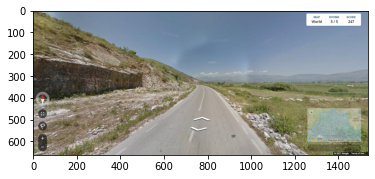

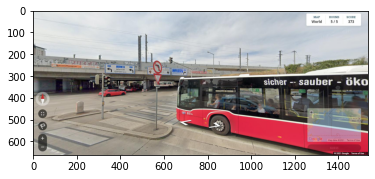

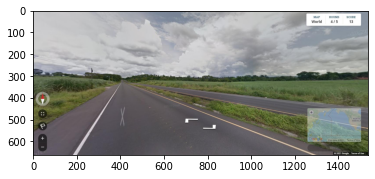

In [ ]:
## 4b. Show some data
"""
    *Demonstrate that you have made at least some progress with getting your
     dataset ready to use. Load at least a few examples and visualize them
     as best you can. For example:*
"""
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

sample_img_paths = ["Albania.jpg",
                    "Australia.jpg", 
                    "Guatemala.jpg"]

for path in sample_img_paths:
     image = mpimg.imread(path) # images are color images
     plt.show()
     plt.imshow(image)

plt.show()

## 5. Methods

*Describe what methods you plan to use. Give a one or two sentence history of how and when these methods were developed, and be sure to cite relevant papers. What kind of neural network architectures will you use? What loss function(s) will you use and why? How will you evaluate your model's ability to generalize to new data? For example:*

The main task of this project is solving a classification problem consisting of predicting the country of a given image given the image. A traditional approach to image classification is utilizing an existing neural network trained on millions of images (ImageNet) as a feature-extractor and then fine-tuning a task-specific “head” of neurons to classify countries based on those features. CNNs were originally developed in the 1980s by Yann LeCun [3] and became very popular in 2012 when AlexNet excelled in the ImageNet classification task [4]. The output layer of the head has a softmax activation function that is capable of outputting probability scores, and uses a cross-entropy loss, as it is an excellent loss function for classification tasks. We will use a validation set to fine tune parameters and determine the end of training, and a test set to evaluate generalization to unseen datasets, measuring metrics such as the F1 score. In addition, we may use techniques such as regularization and data augmentation to prevent overfitting.

## 6. Deliverables

*Include at least six goals that you think you should be able to achieve over the course of the quarter. These should be nontrivial, but you should have at least one and hopefully both of your "Essential" goals done by the project update, due February 24. Your "Stretch" goals should be ambitious enough such that completing one is doable, but completing both this quarter is unlikely.*

### 6.1 Essential Goals
- Fine-tune an existing generic (non-geoguesser specific) CNN classifier to infer geographic location from images that performs above a prior probability model. The prediction will be a confidence score over a universe of countries. Examples of classifiers that we can use for feature extraction include ResNet, Inception, VCG. 
- Measure cross-entropy loss and F1 score to evaluate the model performance on country classification. Utilize techniques such as checkpointing to obtain best model weights. Measure results over test dataset. 


### 6.2 Desired Goals
- Create a new CNN model and train it only on the sample dataset. Then compare the performance with the fine tuned model from essential goals.
- Apply regularization techniques (dropout, batch normalization, data augmentation) and compare performance on both models. We will follow a systematic approach to trying different hyperparameters to these regularization techniques. 


### 6.3 Stretch Goals
- Rearchitect the model to predict coordinates rather than classify countries of images. 
- Use SIFT (Scale Invariant Feature Transforms)  to detect alphabets, country-specific poles and signs. SIFT are transforms of an image that can be used to extract specific features of an image, such as poles, traffic signs, etc. 
- Apply active learning to further train the model.  Extend the dataset and use active learning for finding which examples to label in a more extensive but unlabeled dataset
- Apply reinforcement learning. Make the model play the game and train it interactively by playing Geoguessr.


## 7. Hopes and Concerns

*What are you most excited about with this project? What parts, if any, are you nervous about? For example:*

We’re excited to ‘see what the model sees’, and try to peek under the hood of what predictions it makes to understand what features it’s looking at. What might its strengths (and weaknesses) reveal about the strengths of a particular approach—say CNNs vs reinforcement learning? There are a lot of unanswered questions that make this project particularly exciting. 

However, the data collection and cleaning stage might be challenging, particularly as we try to combine datasets with different image resolutions and metadata. This may also complicate the data augmentation process, which is something that we hope to achieve. 


## 8. References

*Cite the papers or sources that you used to discover your datasets and/or models, if you didn't include the citation above. For example:*

[1] Suresh, Sudharshan, Nathaniel Chodosh, and Montiel Abello. "DeepGeo: Photo localization with deep neural network." arXiv preprint arXiv:1810.03077 (2018).

[2] Weyand, Tobias, Ilya Kostrikov, and James Philbin. "Planet-photo geolocation with convolutional neural networks." In Computer Vision–ECCV 2016: 14th European Conference, Amsterdam, The Netherlands, October 11-14, 2016, Proceedings, Part VIII 14, pp. 37-55. Springer International Publishing, 2016.

[3] Yann LeCun, Patrick Haffner, Léon Bottou, and Yoshua Bengio. 1999. Object Recognition with Gradient-Based Learning. In Shape, Contour and Grouping in Computer Vision. Springer-Verlag, Berlin, Heidelberg, 319.

[4] Alex Krizhevsky, Ilya Sutskever, and Geoffrey E. Hinton. 2012. ImageNet classification with deep convolutional neural networks. In Proceedings of the 25th International Conference on Neural Information Processing Systems - Volume 1 (NIPS'12). Curran Associates Inc., Red Hook, NY, USA, 1097–1105.